In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# f = open("C://Users/hitec/Documents/mydata.txt", 'r', encoding='UTF8')

In [3]:
db = pd.read_csv("서울교통공사_혼잡도_20191231.csv", header=0, engine='python')
df = DataFrame(db)
df.head()

,조사일자,호선,역번호,역명,구분,구분.1,5:30,6:00,6:30,7:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
0,평일,1호선,150,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
1,평일,1호선,150,서울역,하선,혼잡도,11.80%,13.50%,12.20%,17.80%,...,36.50%,31.20%,37.60%,44.60%,45.60%,37.80%,28.80%,19.30%,7.10%,0.40%
2,평일,1호선,151,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
3,평일,1호선,151,시청,하선,혼잡도,9.50%,11.30%,11.60%,16.70%,...,32.00%,27.70%,34.80%,39.30%,37.40%,36.30%,23.00%,18.10%,4.00%,1.60%
4,평일,1호선,152,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%


In [5]:
df['호선']

0       1호선
1       1호선
2       1호선
3       1호선
4       1호선
       ... 
1663    8호선
1664    8호선
1665    8호선
1666    8호선
1667    8호선
Name: 호선, Length: 1668, dtype: object

In [4]:
is_wkday = df['조사일자']=="평일"
is_line1 = df['호선']=="1호선"
df_subset = df[is_wkday & is_line1]

'''
DataFrame.set_index(key, drop, append, inplace)
DataFrame.reset_index(drop, inplace)
'''

df_subset.set_index('역번호', drop=True, append=False, inplace=True)
df_subset.head()

,조사일자,호선,역명,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,평일,1호선,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,46.70%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
150,평일,1호선,서울역,하선,혼잡도,11.80%,13.50%,12.20%,17.80%,26.40%,...,36.50%,31.20%,37.60%,44.60%,45.60%,37.80%,28.80%,19.30%,7.10%,0.40%
151,평일,1호선,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,36.20%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
151,평일,1호선,시청,하선,혼잡도,9.50%,11.30%,11.60%,16.70%,23.20%,...,32.00%,27.70%,34.80%,39.30%,37.40%,36.30%,23.00%,18.10%,4.00%,1.60%
152,평일,1호선,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,22.70%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%


In [5]:
is_uptrack = df_subset['구분']=="상선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.head()

,조사일자,호선,역명,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,평일,1호선,서울역,상선,혼잡도,8.20%,12.90%,21.50%,28.40%,46.70%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
151,평일,1호선,시청,상선,혼잡도,7.70%,11.20%,19.60%,24.40%,36.20%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
152,평일,1호선,종각,상선,혼잡도,6.30%,8.10%,15.50%,16.60%,22.70%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%
153,평일,1호선,종로3가,상선,혼잡도,6.30%,8.10%,14.40%,16.30%,22.90%,...,27.10%,25.20%,32.90%,33.80%,40.10%,28.90%,20.50%,14.20%,10.40%,1.20%
154,평일,1호선,종로5가,상선,혼잡도,5.60%,6.50%,12.40%,12.40%,16.50%,...,28.70%,27.60%,33.50%,34.90%,42.70%,29.10%,21.90%,14.00%,11.00%,1.10%


In [6]:
df_uptrack.drop(['조사일자','호선','역명','구분','구분.1'], axis=1, inplace=True)
df_uptrack.head()

C:\Users\SIMHYUNCHAE\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,8.20%,12.90%,21.50%,28.40%,46.70%,70.00%,74.50%,52.20%,57.10%,38.50%,...,15.10%,15.90%,17.10%,16.00%,19.00%,15.20%,10.50%,7.80%,6.00%,0.90%
151,7.70%,11.20%,19.60%,24.40%,36.20%,53.70%,51.70%,47.10%,47.10%,37.40%,...,18.70%,18.30%,20.70%,22.00%,24.00%,18.70%,13.70%,10.00%,6.90%,1.00%
152,6.30%,8.10%,15.50%,16.60%,22.70%,34.80%,28.70%,32.40%,35.00%,30.60%,...,25.80%,24.20%,30.00%,31.90%,34.00%,26.80%,18.80%,12.50%,9.10%,1.20%
153,6.30%,8.10%,14.40%,16.30%,22.90%,36.20%,34.80%,31.10%,32.50%,30.50%,...,27.10%,25.20%,32.90%,33.80%,40.10%,28.90%,20.50%,14.20%,10.40%,1.20%
154,5.60%,6.50%,12.40%,12.40%,16.50%,28.80%,23.60%,21.30%,28.60%,24.80%,...,28.70%,27.60%,33.50%,34.90%,42.70%,29.10%,21.90%,14.00%,11.00%,1.10%


In [7]:
cols = list(df_uptrack)

for col in cols:
    df_uptrack_pre = df_uptrack.replace('\%','',regex=True)

df_uptrack_pre.head()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역번호,,,,,,,,,,,,,,,,,,,,,
150,8.20,12.90,21.50,28.40,46.70,70.00,74.50,52.20,57.10,38.50,...,15.10,15.90,17.10,16.00,19.00,15.20,10.50,7.80,6.00,0.90
151,7.70,11.20,19.60,24.40,36.20,53.70,51.70,47.10,47.10,37.40,...,18.70,18.30,20.70,22.00,24.00,18.70,13.70,10.00,6.90,1.00
152,6.30,8.10,15.50,16.60,22.70,34.80,28.70,32.40,35.00,30.60,...,25.80,24.20,30.00,31.90,34.00,26.80,18.80,12.50,9.10,1.20
153,6.30,8.10,14.40,16.30,22.90,36.20,34.80,31.10,32.50,30.50,...,27.10,25.20,32.90,33.80,40.10,28.90,20.50,14.20,10.40,1.20
154,5.60,6.50,12.40,12.40,16.50,28.80,23.60,21.30,28.60,24.80,...,28.70,27.60,33.50,34.90,42.70,29.10,21.90,14.00,11.00,1.10


In [8]:
time = list(df_uptrack_pre)

df_uptrack_trans = df_uptrack_pre.transpose(copy=True)
df_uptrack2 = df_uptrack_trans.astype('float')
df_uptrack_assign = df_uptrack2.assign(Time=time)

df_uptrack_assign.reset_index(drop=True, inplace=True)
df_uptrack_assign.head()

역번호,150,151,152,153,154,155,156,157,158,159,Time
0,8.2,7.7,6.3,6.3,5.6,8.5,7.2,6.9,6.4,6.9,5:30
1,12.9,11.2,8.1,8.1,6.5,6.7,7.9,7.4,5.1,8.7,6:00
2,21.5,19.6,15.5,14.4,12.4,12.0,9.1,7.2,6.0,10.1,6:30
3,28.4,24.4,16.6,16.3,12.4,11.0,8.5,8.7,6.2,9.6,7:00
4,46.7,36.2,22.7,22.9,16.5,16.2,10.5,8.6,8.1,12.7,7:30


In [9]:
df_uptrack_plot = df_uptrack_assign.astype({'Time':'string'})
print(df_uptrack_plot.dtypes)

역번호
150     float64
151     float64
152     float64
153     float64
154     float64
155     float64
156     float64
157     float64
158     float64
159     float64
Time     string
dtype: object


In [10]:
list(df_uptrack_plot)

[150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 'Time']

In [11]:
import seaborn as sns

In [12]:
df_uptrack_plot.head()

역번호,150,151,152,153,154,155,156,157,158,159,Time
0,8.2,7.7,6.3,6.3,5.6,8.5,7.2,6.9,6.4,6.9,5:30
1,12.9,11.2,8.1,8.1,6.5,6.7,7.9,7.4,5.1,8.7,6:00
2,21.5,19.6,15.5,14.4,12.4,12.0,9.1,7.2,6.0,10.1,6:30
3,28.4,24.4,16.6,16.3,12.4,11.0,8.5,8.7,6.2,9.6,7:00
4,46.7,36.2,22.7,22.9,16.5,16.2,10.5,8.6,8.1,12.7,7:30


In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Seoul Metropolitian Subway Line #1-Uptrack Pop-Time')

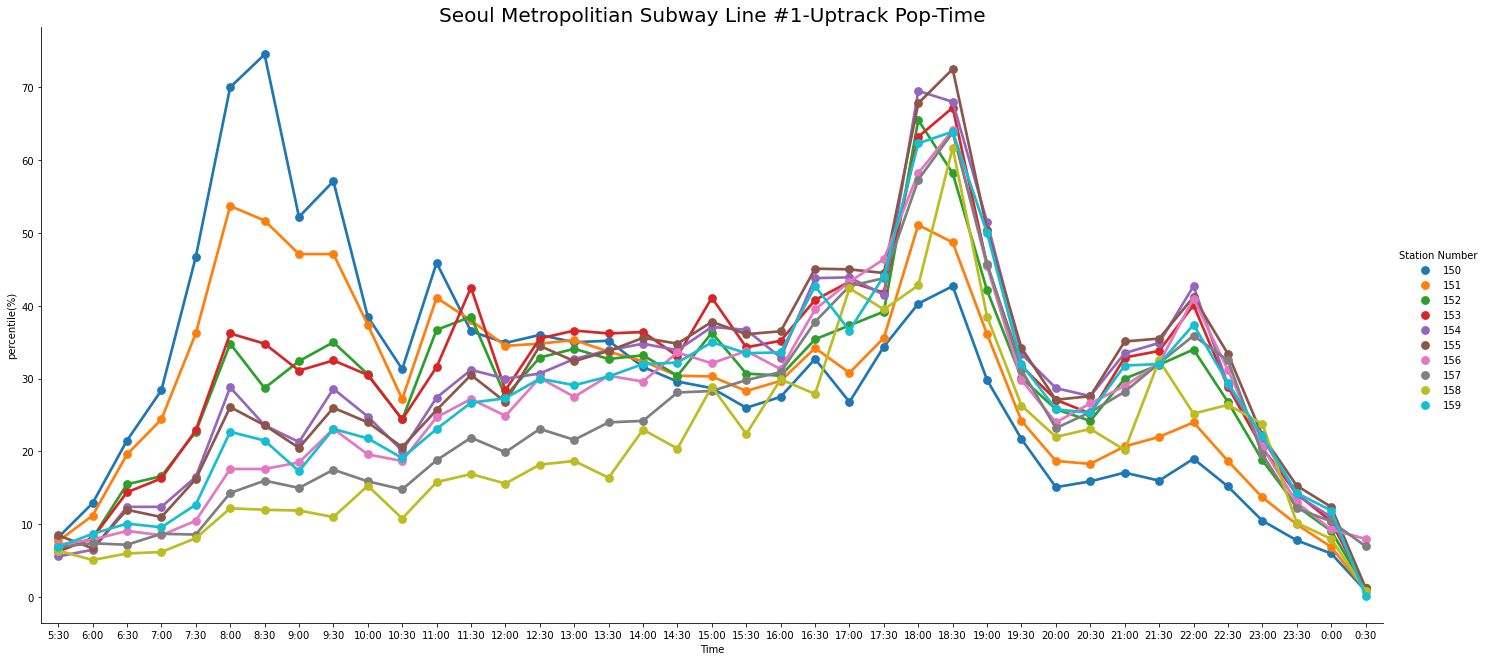

In [14]:
df_plot = df_uptrack_plot.melt('Time', var_name='Station Number', value_name='percentile(%)')
sns_plot = sns.catplot(x="Time", y="percentile(%)", hue='Station Number', data=df_plot, kind='point', height=9.0, aspect=19.5/9.0)
plt.title('Seoul Metropolitian Subway Line #1-Uptrack Pop-Time', fontsize=20)
# sns_plot.set_axis_labels("","Unit: %")
# g.set_titles("Seoul Metropolitian Subway Line #1-Uptrack Popular Time")

In [15]:
sns_plot.savefig("Seoul Line1 Uptrack pop-time")

In [16]:
'''
# 상-하선 구분 및 열 제거
is_uptrack = df_subset['구분']=="상선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.drop(['조사일자','호선','구분','구분.1'], axis=1, inplace=True)

is_downtrack = df_subset['구분']=="하선"
df_downtrack = df_subset[is_downtrack]
df_downtrack.drop(['조사일자','호선','구분','구분.1'], axis=1, inplace=True)

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-16-fd234bd13b97>, line 9)

## 변수 바꿔가며 만들어보자

In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# f = open("C://Users/hitec/Documents/mydata.txt", 'r', encoding='UTF8')

In [3]:
db = pd.read_csv("서울교통공사_혼잡도_20191231.csv", header=0, engine='python')
df = DataFrame(db)
# df.head()
# df['호선']

In [4]:
is_wkday = df['조사일자']=="평일"
is_line1 = df['호선']=="2호선"
df_subset = df[is_wkday & is_line1]

'''
DataFrame.set_index(key, drop, append, inplace)
DataFrame.reset_index(drop, inplace)
'''

df_subset.set_index('역명', drop=True, append=False, inplace=True)
df_subset.head()

,조사일자,호선,역번호,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
시청,평일,2호선,201,내선,혼잡도,19.70%,19.70%,25.50%,36.00%,52.60%,...,23.50%,23.00%,31.40%,38.00%,40.00%,38.20%,34.10%,32.60%,13.70%,4.60%
시청,평일,2호선,201,외선,혼잡도,12.50%,20.40%,11.80%,18.10%,33.20%,...,54.60%,50.70%,48.70%,45.80%,57.30%,52.80%,40.70%,28.40%,16.50%,10.70%
을지로입구,평일,2호선,202,내선,혼잡도,15.30%,16.80%,18.80%,24.40%,37.40%,...,32.10%,30.30%,39.00%,48.70%,47.50%,42.10%,40.30%,35.60%,13.80%,6.10%
을지로입구,평일,2호선,202,외선,혼잡도,11.30%,21.30%,12.90%,20.90%,40.30%,...,51.60%,45.00%,42.30%,44.40%,52.20%,48.40%,36.10%,28.00%,14.50%,10.20%
을지로3가,평일,2호선,203,내선,혼잡도,14.70%,16.40%,17.90%,22.10%,32.80%,...,30.70%,28.20%,42.40%,47.50%,44.70%,47.40%,34.60%,47.80%,14.60%,5.90%


In [5]:
is_uptrack = df_subset['구분']=="외선"
df_uptrack = df_subset[is_uptrack]
df_uptrack.head()

,조사일자,호선,역번호,구분,구분.1,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
시청,평일,2호선,201,외선,혼잡도,12.50%,20.40%,11.80%,18.10%,33.20%,...,54.60%,50.70%,48.70%,45.80%,57.30%,52.80%,40.70%,28.40%,16.50%,10.70%
을지로입구,평일,2호선,202,외선,혼잡도,11.30%,21.30%,12.90%,20.90%,40.30%,...,51.60%,45.00%,42.30%,44.40%,52.20%,48.40%,36.10%,28.00%,14.50%,10.20%
을지로3가,평일,2호선,203,외선,혼잡도,15.80%,24.60%,16.40%,28.90%,53.70%,...,37.30%,37.40%,32.10%,31.80%,41.10%,42.20%,25.40%,22.10%,12.60%,7.40%
을지로4가,평일,2호선,204,외선,혼잡도,16.60%,27.20%,17.90%,36.70%,61.90%,...,34.10%,32.40%,28.90%,30.10%,39.90%,36.10%,23.80%,19.20%,11.80%,6.60%
동대문역사문화공원,평일,2호선,205,외선,혼잡도,16.60%,29.80%,18.50%,40.90%,68.10%,...,34.80%,31.00%,27.30%,30.90%,41.50%,35.90%,22.80%,19.50%,10.30%,6.30%


In [6]:
df_uptrack.drop(['조사일자','호선','역번호','구분','구분.1'], axis=1, inplace=True)
df_uptrack

C:\Users\SIMHYUNCHAE\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
시청,12.50%,20.40%,11.80%,18.10%,33.20%,40.50%,27.60%,28.30%,27.90%,25.70%,...,54.60%,50.70%,48.70%,45.80%,57.30%,52.80%,40.70%,28.40%,16.50%,10.70%
을지로입구,11.30%,21.30%,12.90%,20.90%,40.30%,52.10%,39.80%,33.90%,28.90%,27.00%,...,51.60%,45.00%,42.30%,44.40%,52.20%,48.40%,36.10%,28.00%,14.50%,10.20%
을지로3가,15.80%,24.60%,16.40%,28.90%,53.70%,75.00%,63.60%,43.00%,40.90%,29.20%,...,37.30%,37.40%,32.10%,31.80%,41.10%,42.20%,25.40%,22.10%,12.60%,7.40%
을지로4가,16.60%,27.20%,17.90%,36.70%,61.90%,79.60%,64.90%,44.20%,42.80%,29.80%,...,34.10%,32.40%,28.90%,30.10%,39.90%,36.10%,23.80%,19.20%,11.80%,6.60%
동대문역사문화공원,16.60%,29.80%,18.50%,40.90%,68.10%,85.70%,68.60%,48.40%,43.40%,31.40%,...,34.80%,31.00%,27.30%,30.90%,41.50%,35.90%,22.80%,19.50%,10.30%,6.30%
신당,24.20%,20.60%,20.40%,45.30%,63.50%,92.90%,64.60%,48.60%,49.10%,33.80%,...,41.20%,39.10%,39.00%,35.60%,48.60%,45.20%,26.70%,22.20%,12.10%,6.80%
상왕십리,21.30%,22.10%,18.20%,40.90%,62.50%,92.10%,63.00%,47.20%,48.50%,34.60%,...,44.60%,41.40%,38.60%,39.40%,49.80%,44.70%,24.90%,26.00%,13.80%,3.40%
왕십리,19.40%,20.90%,17.20%,39.70%,58.80%,87.10%,58.80%,46.50%,44.10%,34.70%,...,45.50%,39.60%,39.10%,41.80%,52.50%,44.10%,28.50%,23.00%,14.60%,3.90%
한양대,11.90%,13.80%,13.90%,29.70%,41.00%,57.40%,34.20%,30.80%,31.30%,23.90%,...,37.20%,34.50%,34.10%,32.10%,45.10%,35.80%,23.00%,17.10%,11.50%,4.30%


In [7]:
cols = list(df_uptrack)

for col in cols:
    df_uptrack_pre = df_uptrack.replace('\%','',regex=True)

df_uptrack_pre.head()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,0:30
역명,,,,,,,,,,,,,,,,,,,,,
시청,12.50,20.40,11.80,18.10,33.20,40.50,27.60,28.30,27.90,25.70,...,54.60,50.70,48.70,45.80,57.30,52.80,40.70,28.40,16.50,10.70
을지로입구,11.30,21.30,12.90,20.90,40.30,52.10,39.80,33.90,28.90,27.00,...,51.60,45.00,42.30,44.40,52.20,48.40,36.10,28.00,14.50,10.20
을지로3가,15.80,24.60,16.40,28.90,53.70,75.00,63.60,43.00,40.90,29.20,...,37.30,37.40,32.10,31.80,41.10,42.20,25.40,22.10,12.60,7.40
을지로4가,16.60,27.20,17.90,36.70,61.90,79.60,64.90,44.20,42.80,29.80,...,34.10,32.40,28.90,30.10,39.90,36.10,23.80,19.20,11.80,6.60
동대문역사문화공원,16.60,29.80,18.50,40.90,68.10,85.70,68.60,48.40,43.40,31.40,...,34.80,31.00,27.30,30.90,41.50,35.90,22.80,19.50,10.30,6.30


In [8]:
time = list(df_uptrack_pre)

df_uptrack_trans = df_uptrack_pre.transpose(copy=True)
df_uptrack2 = df_uptrack_trans.astype('float')
df_uptrack_assign = df_uptrack2.assign(Time=time)

df_uptrack_assign.reset_index(drop=True, inplace=True)
# df_uptrack_assign.head()

df_uptrack_plot = df_uptrack_assign.astype({'Time':'string'})
# print(df_uptrack_plot.dtypes)

# list(df_uptrack_plot)
# df_uptrack_plot.head()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 사용자 운영체제 확인
import platform
platform.system()

'Windows'

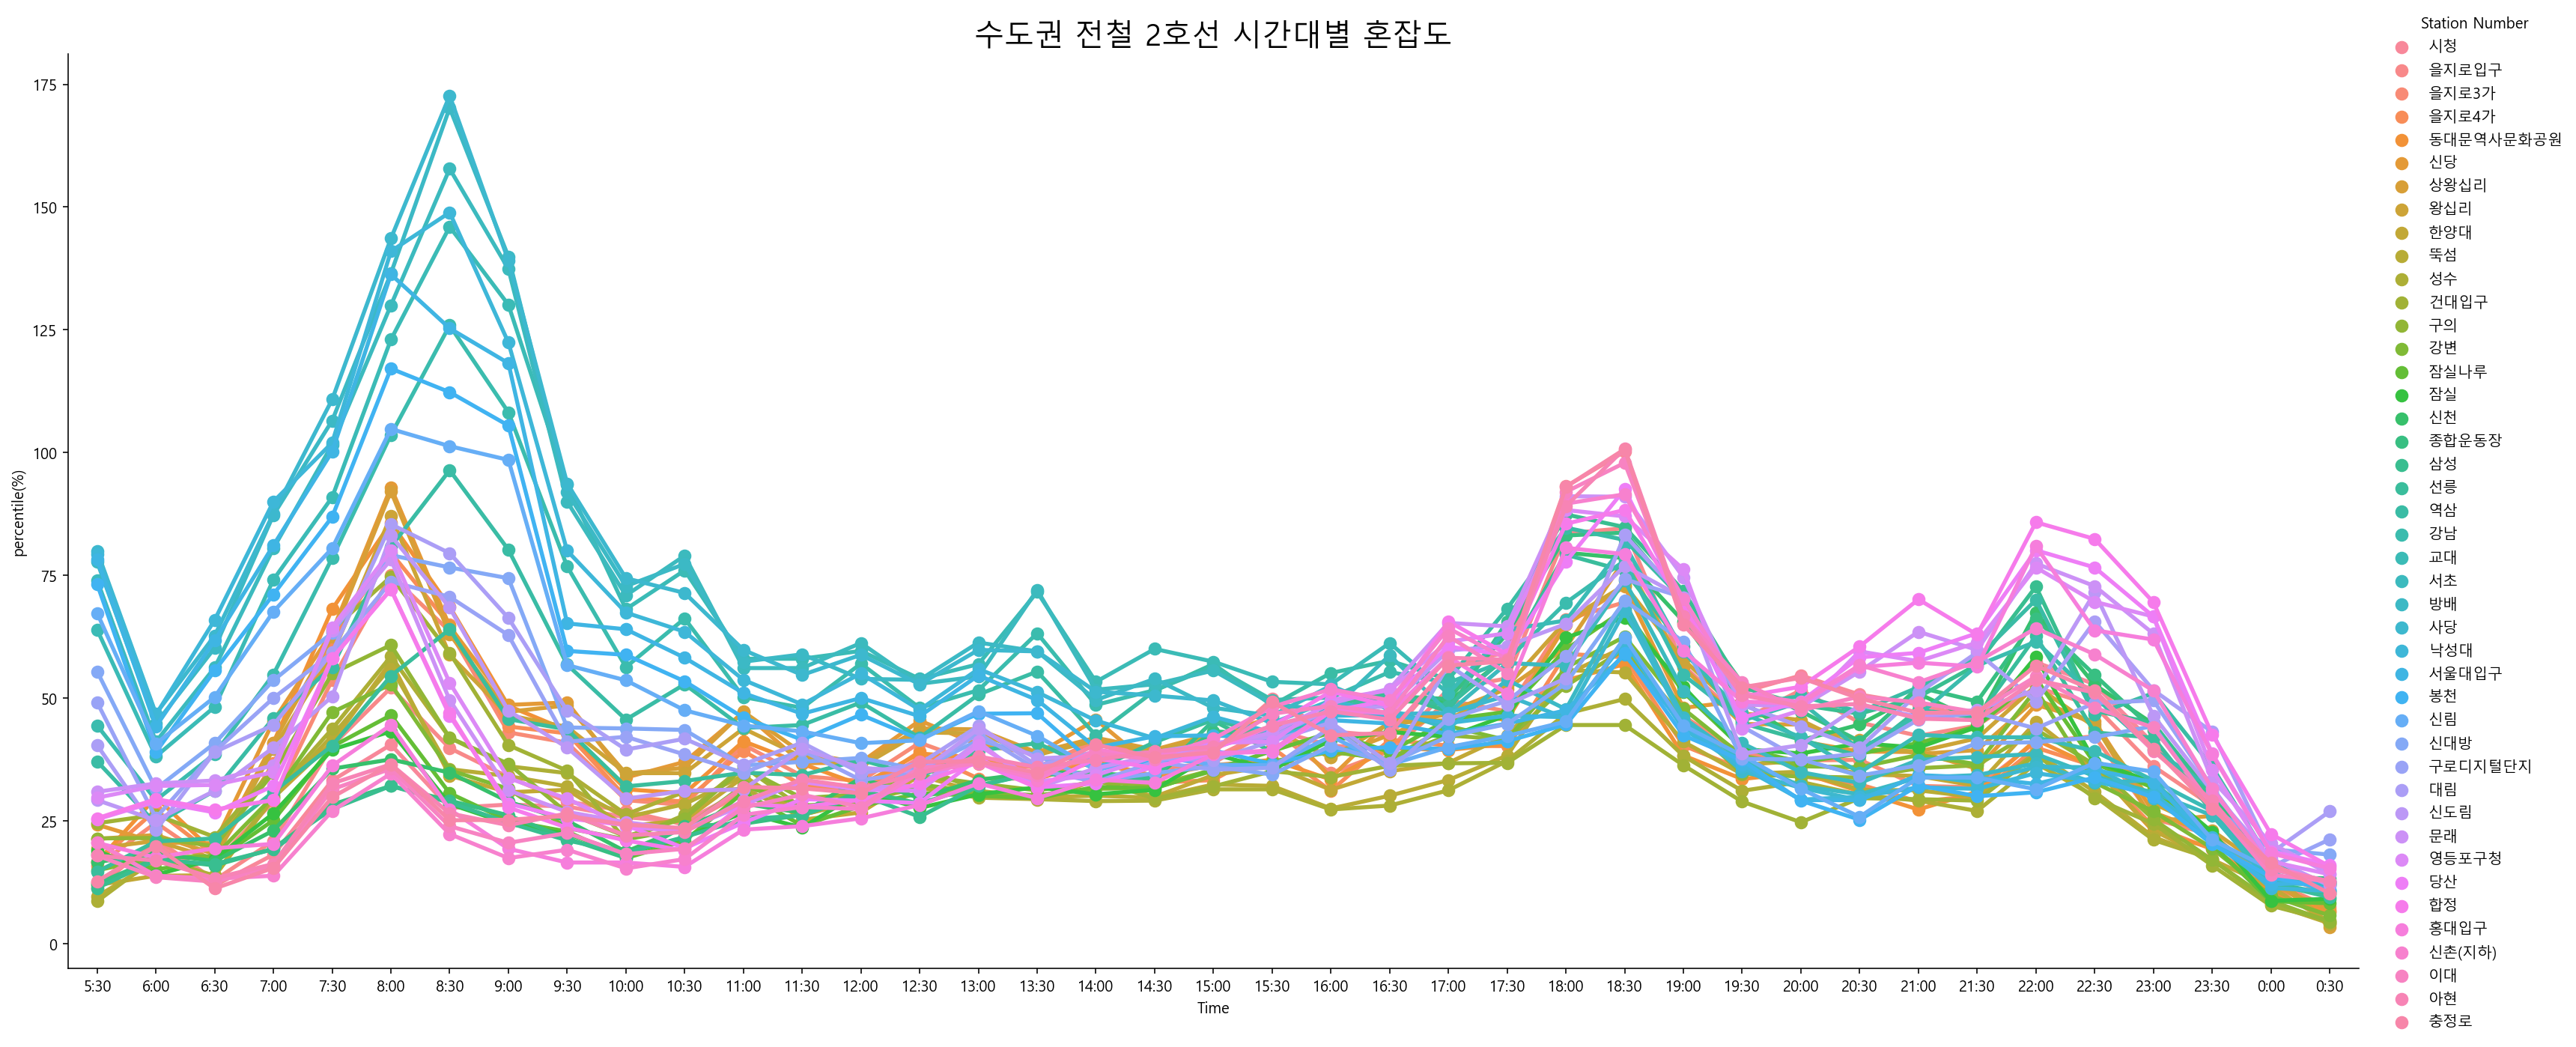

In [10]:
# 폰트 적용
# plt.rcParams['font.family'] = 'Segoe UI'
# Windows 환경 폰트 설정
platform.system() == 'Windows'
plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

df_plot = df_uptrack_plot.melt('Time', var_name='Station Number', value_name='percentile(%)')
sns_plot = sns.catplot(x="Time", y="percentile(%)", hue='Station Number', data=df_plot, kind='point', height=9.0, aspect=22.0/9.0)
plt.title('수도권 전철 2호선 시간대별 혼잡도', fontsize=20)
# sns_plot.set_axis_labels("","Unit: %")
# g.set_titles("Seoul Metropolitian Subway Line #1-Uptrack Popular Time")
sns_plot.savefig("line2up.png")